In [1]:
import logomaker as lm
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
## load model
model = load_model('../models/Auto-m1p/egfp_m1pseudo2_neck100_autoencoder_200k.h5')
scaler = joblib.load("../models/Auto-m1p/egfp_m1pseudo2_neck100_autoencoder_200k.scaler")



In [13]:
# get first 1d conv layer
conv1 = model.layers[1]

fw, bw = conv1.get_weights()
print('filter weight matrix shape: ', fw.shape)
print("eg.", fw[:,:,0])


logos=[]

alph_letters = 'ACGU'
alph = list(alph_letters)


color_scheme = {
    'A' : "tomato",
    'U' : "gold",
    'G' : "skyblue",
    'C': 'lightgreen'
}

filter weight matrix shape:  (8, 4, 120)
eg. [[ 0.02967136  0.01843174  0.05610928  0.06453376]
 [ 0.01024917 -0.00140602  0.05187028  0.00272199]
 [-0.02753571 -0.01629943 -0.00856657  0.04528318]
 [ 0.04739203 -0.00036411 -0.03369871 -0.02535954]
 [ 0.03842319  0.08747921 -0.06243683  0.01303735]
 [-0.00261349  0.06819218 -0.03797605  0.08554318]
 [-0.01530063  0.03711283 -0.05387784 -0.04569064]
 [-0.00554614 -0.03270838 -0.03084067  0.0407245 ]]


In [16]:

def draw_filter_logo(rangel, ranger):
    fig, axs = plt.subplots(10, 4, figsize=(10.6, 15), dpi=300)
    fig.subplots_adjust(hspace=0.8, wspace=0.5)

    axs = axs.ravel()  ## to 1-d numpy array

    for filt_idx in range(rangel,ranger):

        if (filt_idx >= 80):
            ax_idx = filt_idx - 80
        elif (filt_idx >= 40):
            ax_idx = filt_idx - 40
        else:
            ax_idx = filt_idx


        filt_weight_df = pd.DataFrame(fw[:, :, filt_idx], columns=alph)
        logo = lm.Logo(filt_weight_df, ax=axs[ax_idx], font_name='Arial', center_values=True, vpad=0,
                       color_scheme=color_scheme, show_spines=False, flip_below=True)

        baxis = axs[ax_idx].spines['bottom']
        laxis = axs[ax_idx].spines['left']
        baxis.set_visible(True)
        baxis.set_linewidth(0.5)
        # baxis.set_color('grey')
        laxis.set_visible(True)
        laxis.set_linewidth(0.5)
        # laxis.set_color('grey')

        axs[ax_idx].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
        axs[ax_idx].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8], fontsize=8,fontproperties = 'Arial')

        ylabels = axs[ax_idx].get_yticks()
        ytickmax = max(ylabels)
        ytickmin = min(ylabels)

        axs[ax_idx].set_yticks([-0.25, 0, 0.25])
        axs[ax_idx].tick_params(axis ='both', length=2, width=0.5, pad = 1, colors ='black')
        axs[ax_idx].set_yticklabels([-0.25, 0, 0.25], fontsize=8,fontproperties = 'Arial')

        axs[ax_idx].set_xlabel('Position', fontsize=8, labelpad=3,fontproperties = 'Arial')  ## position和filter weight只显示一个角的图
        axs[ax_idx].set_ylabel('Filter Weight', fontsize=8, labelpad=3,fontproperties = 'Arial')
        axs[ax_idx].set_title('Filter ' + str(filt_idx + 1), fontsize=9,fontproperties = 'Arial')
        logos.append(logo)
    return fig


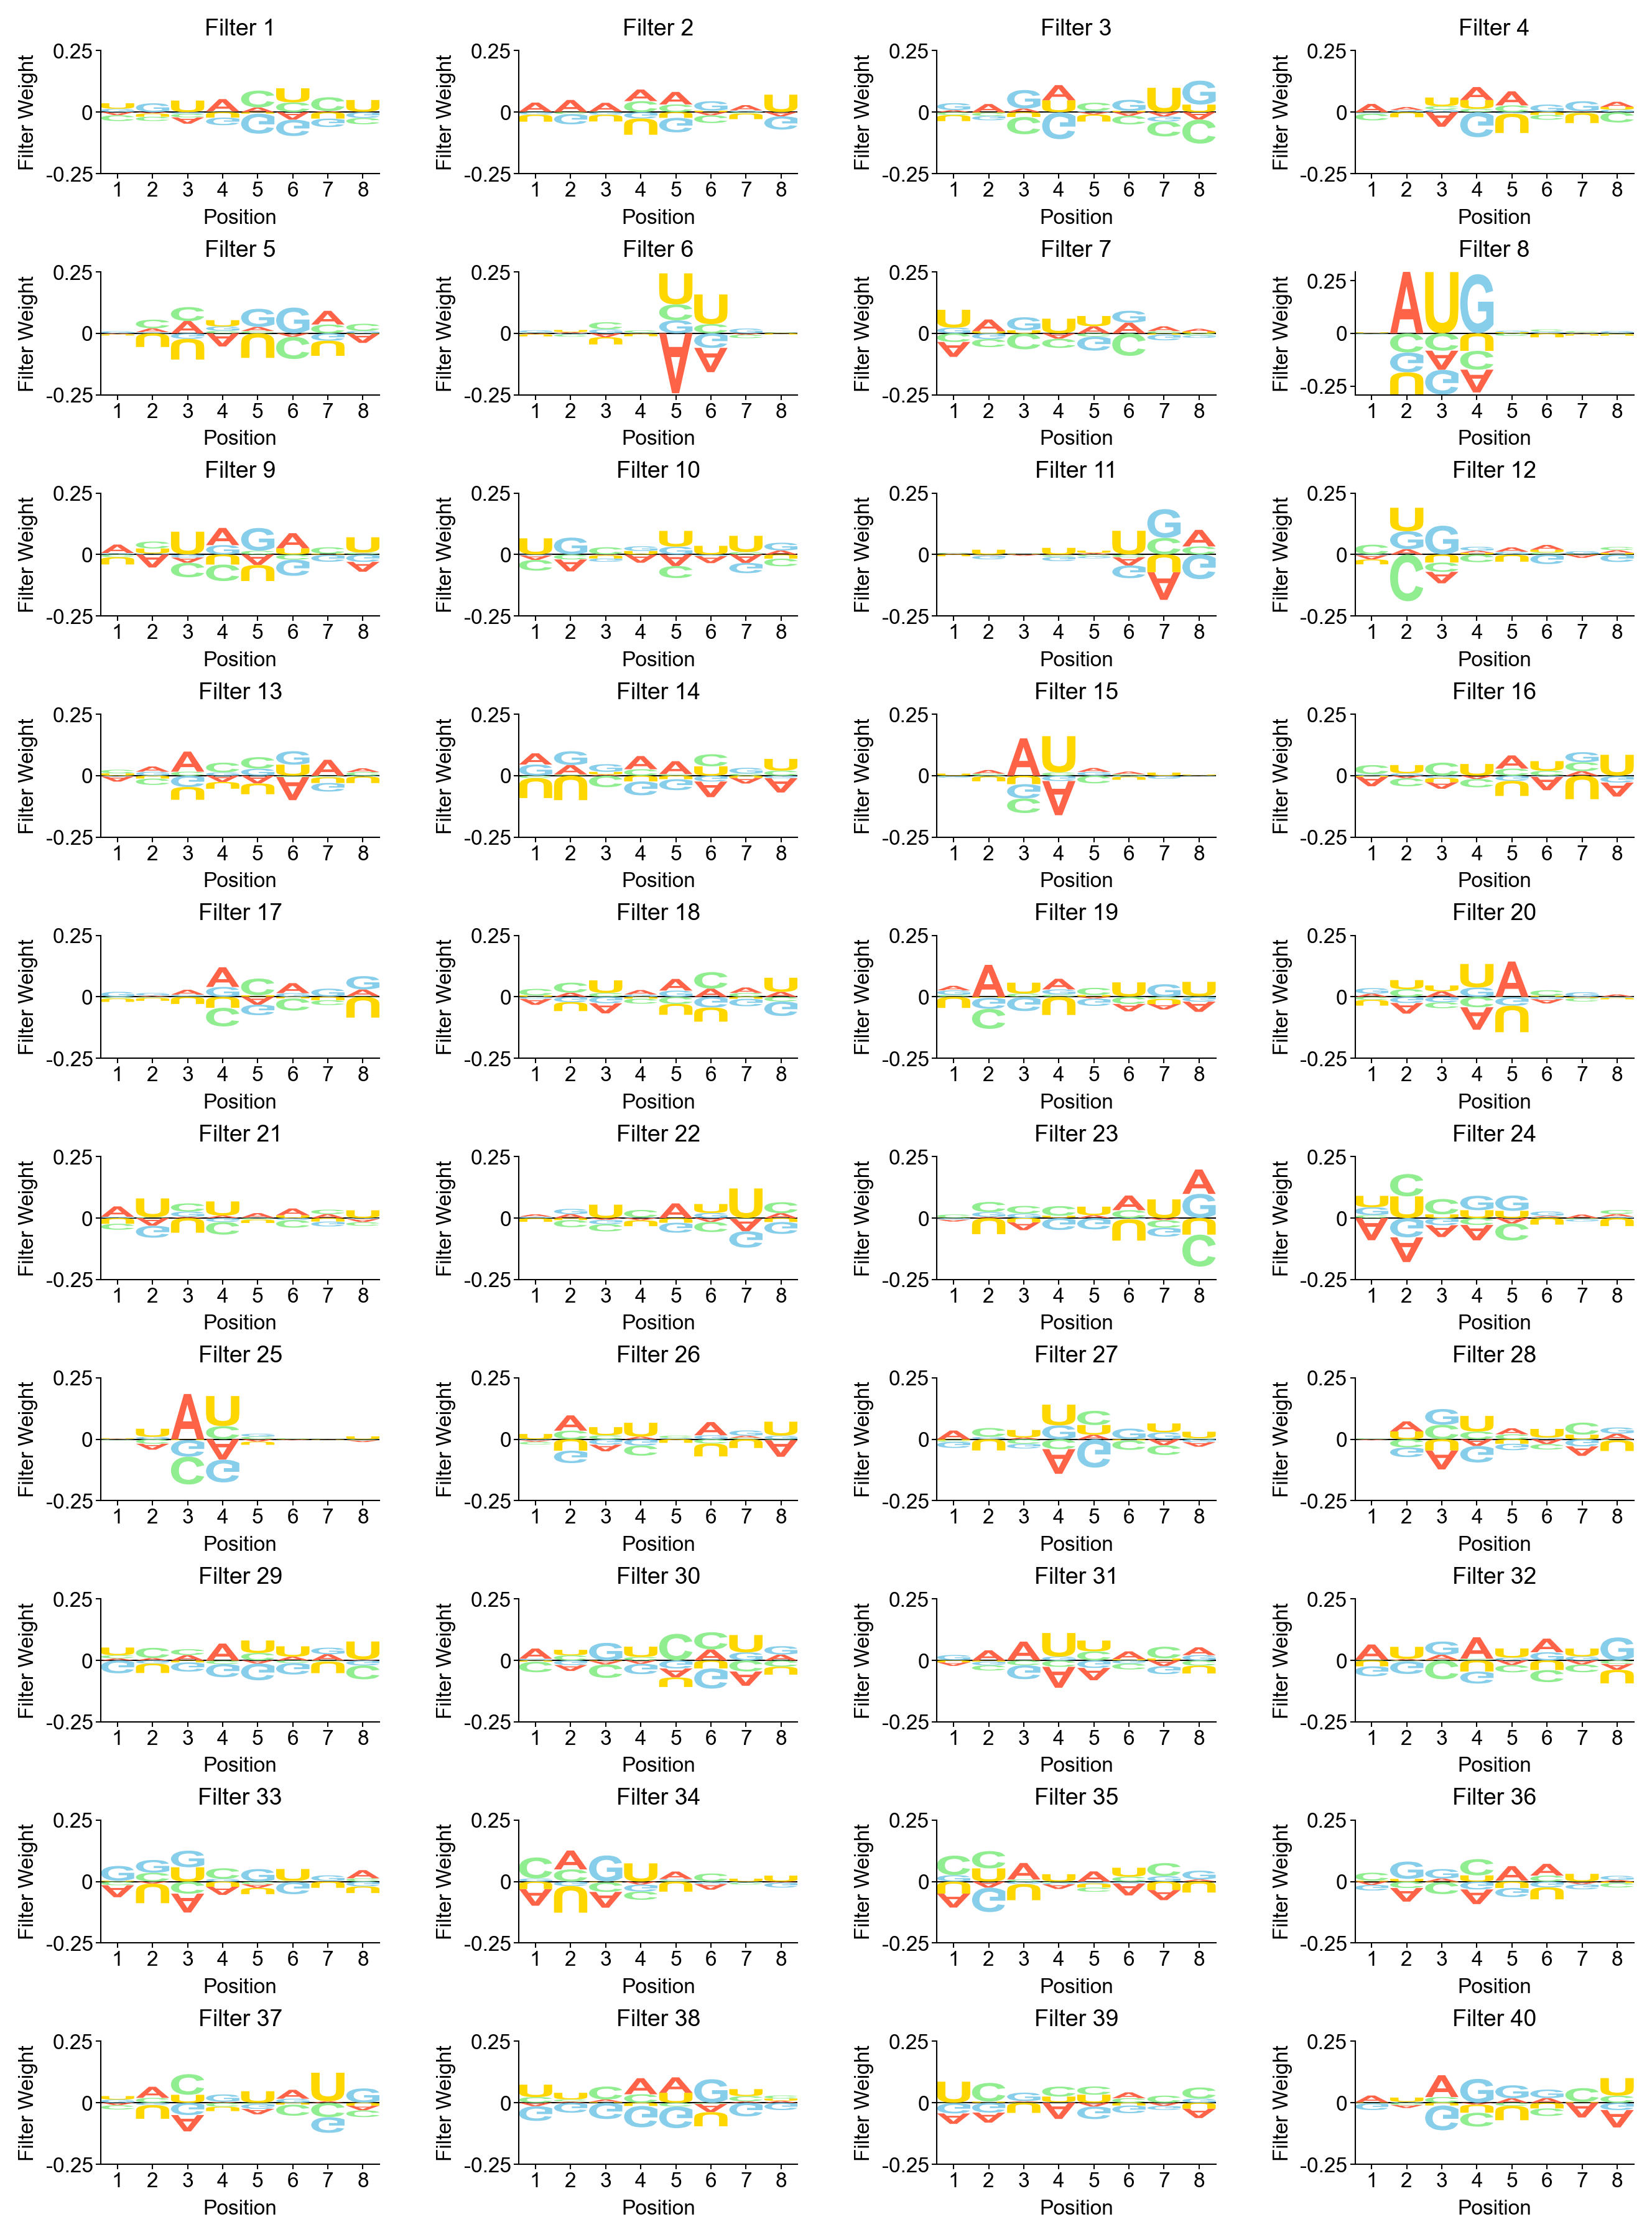

In [17]:
fig1 = draw_filter_logo(0, 40)

In [18]:
fig1.savefig('../figs/filterLogo1-lightcolor.png',dpi=300)

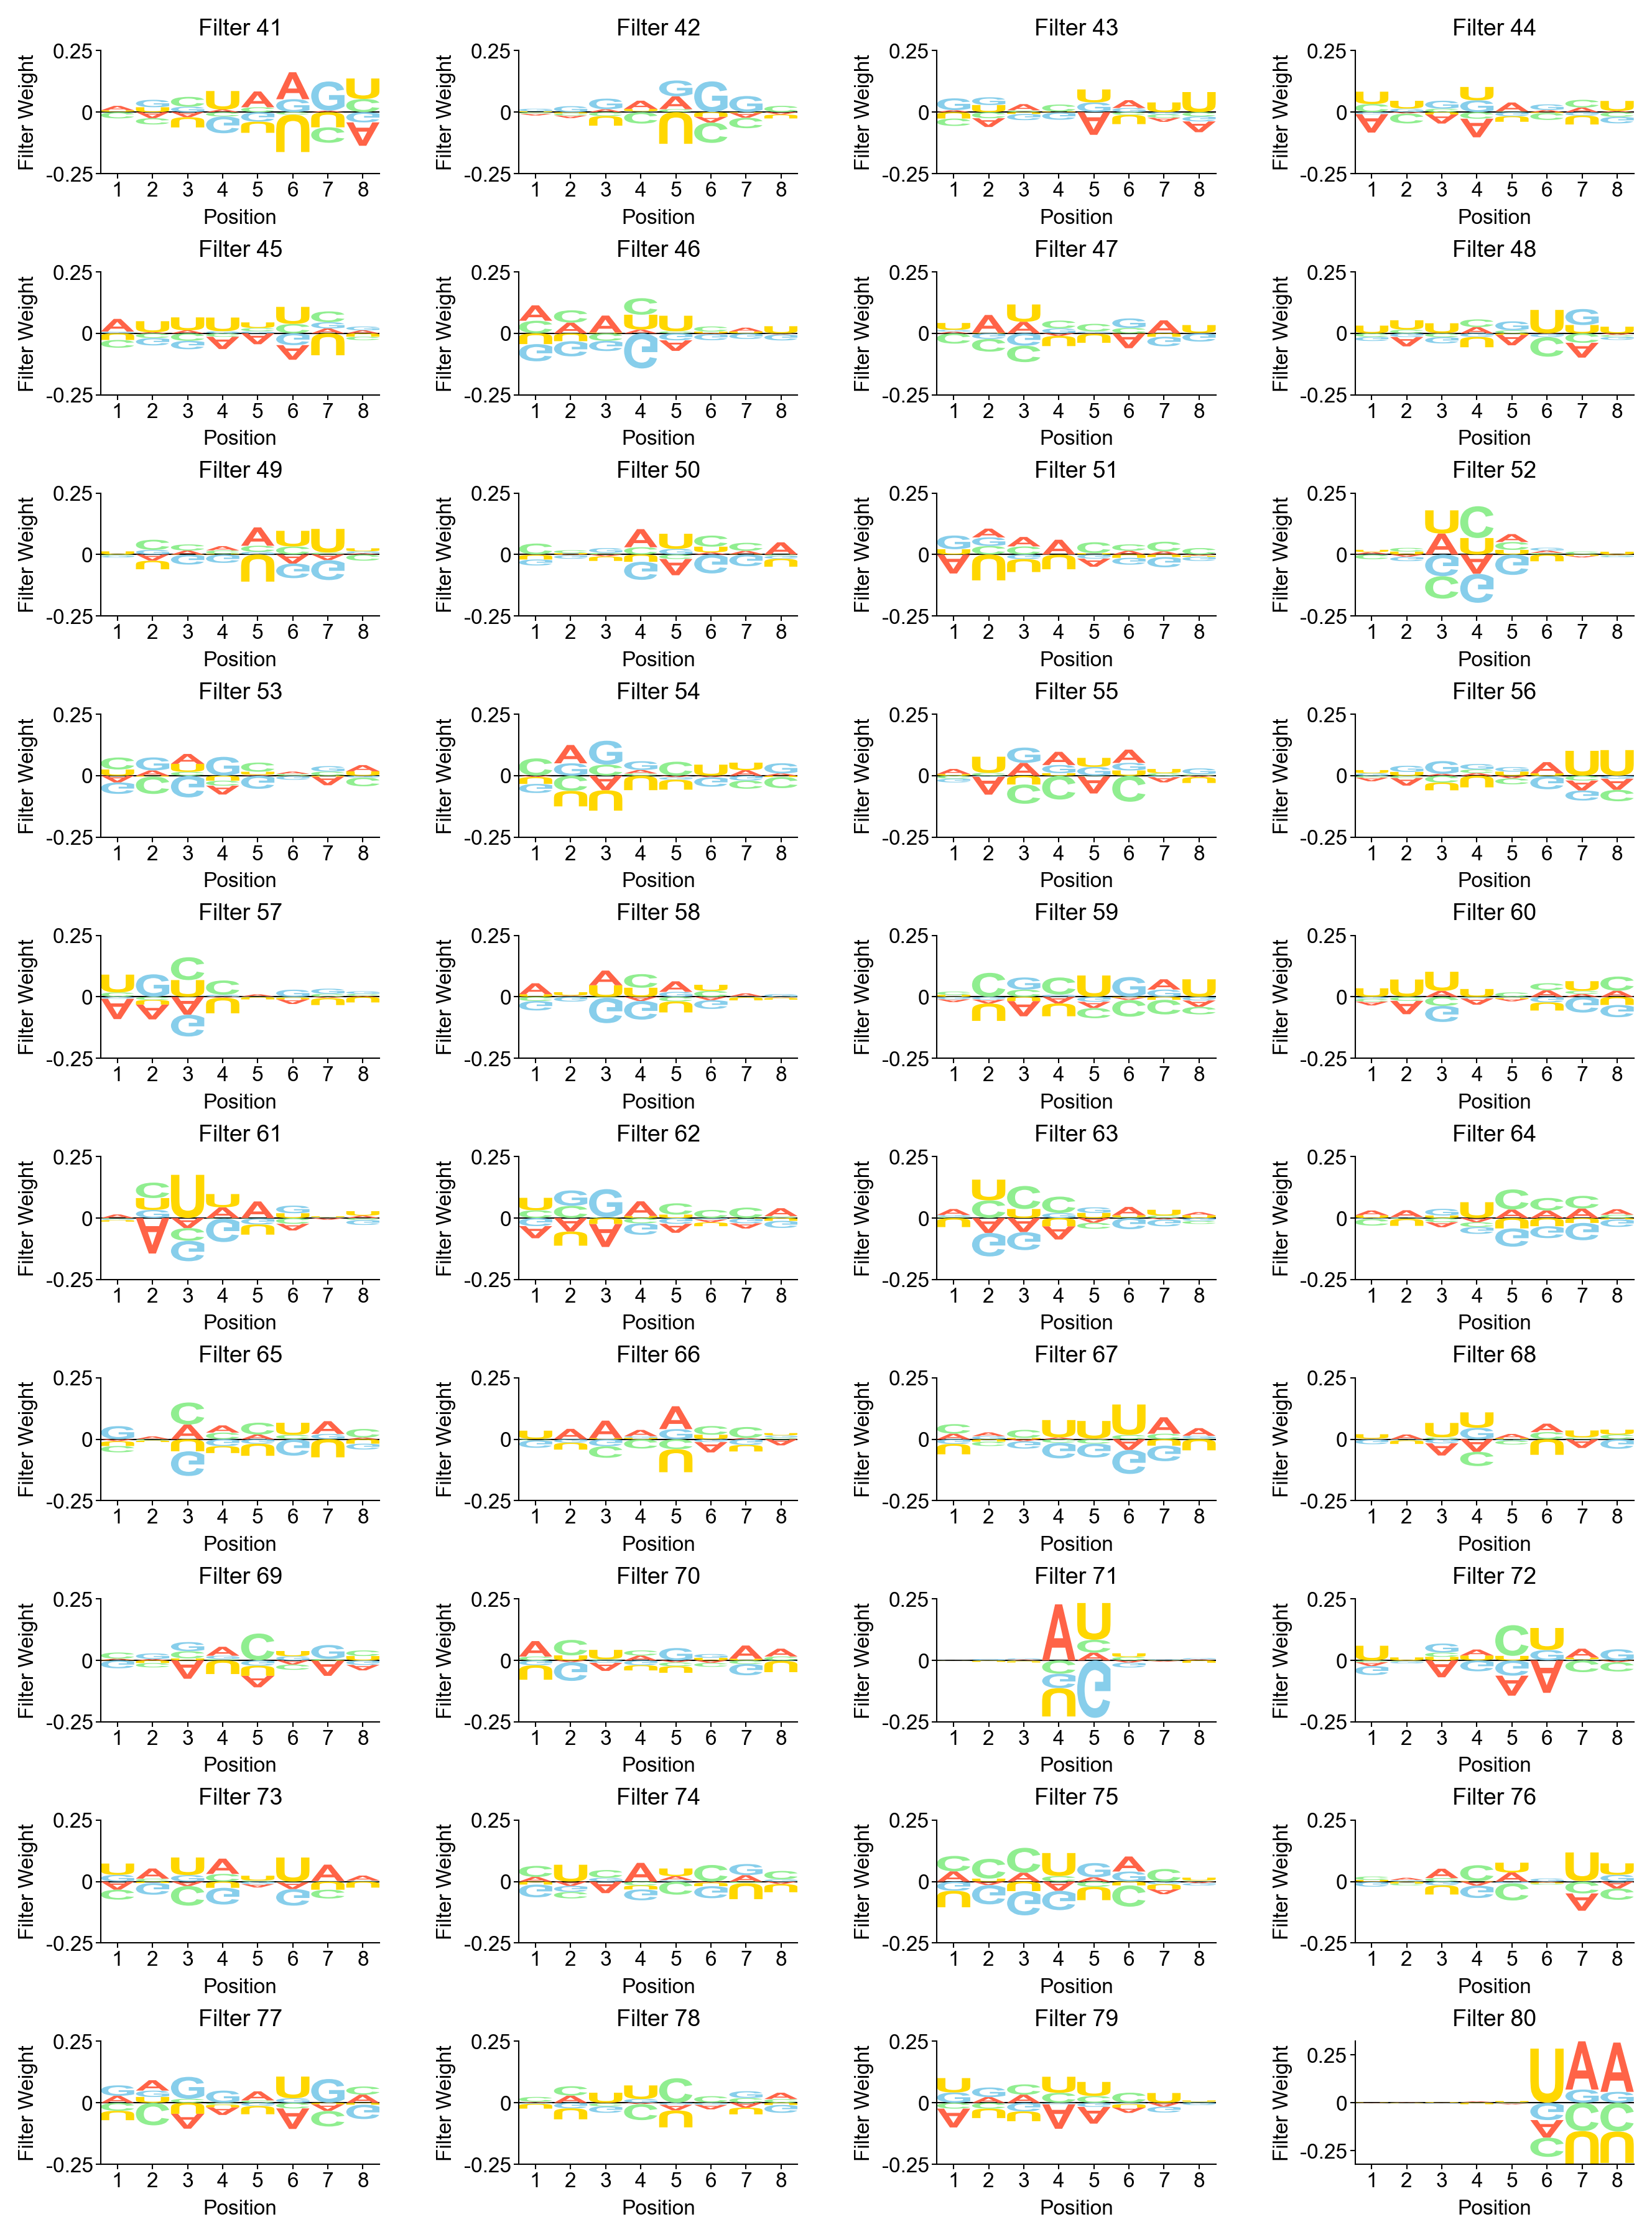

In [21]:
fig2 = draw_filter_logo(40, 80)
fig2.savefig('../figs/filterLogo2-lightcolor.png',dpi=300)

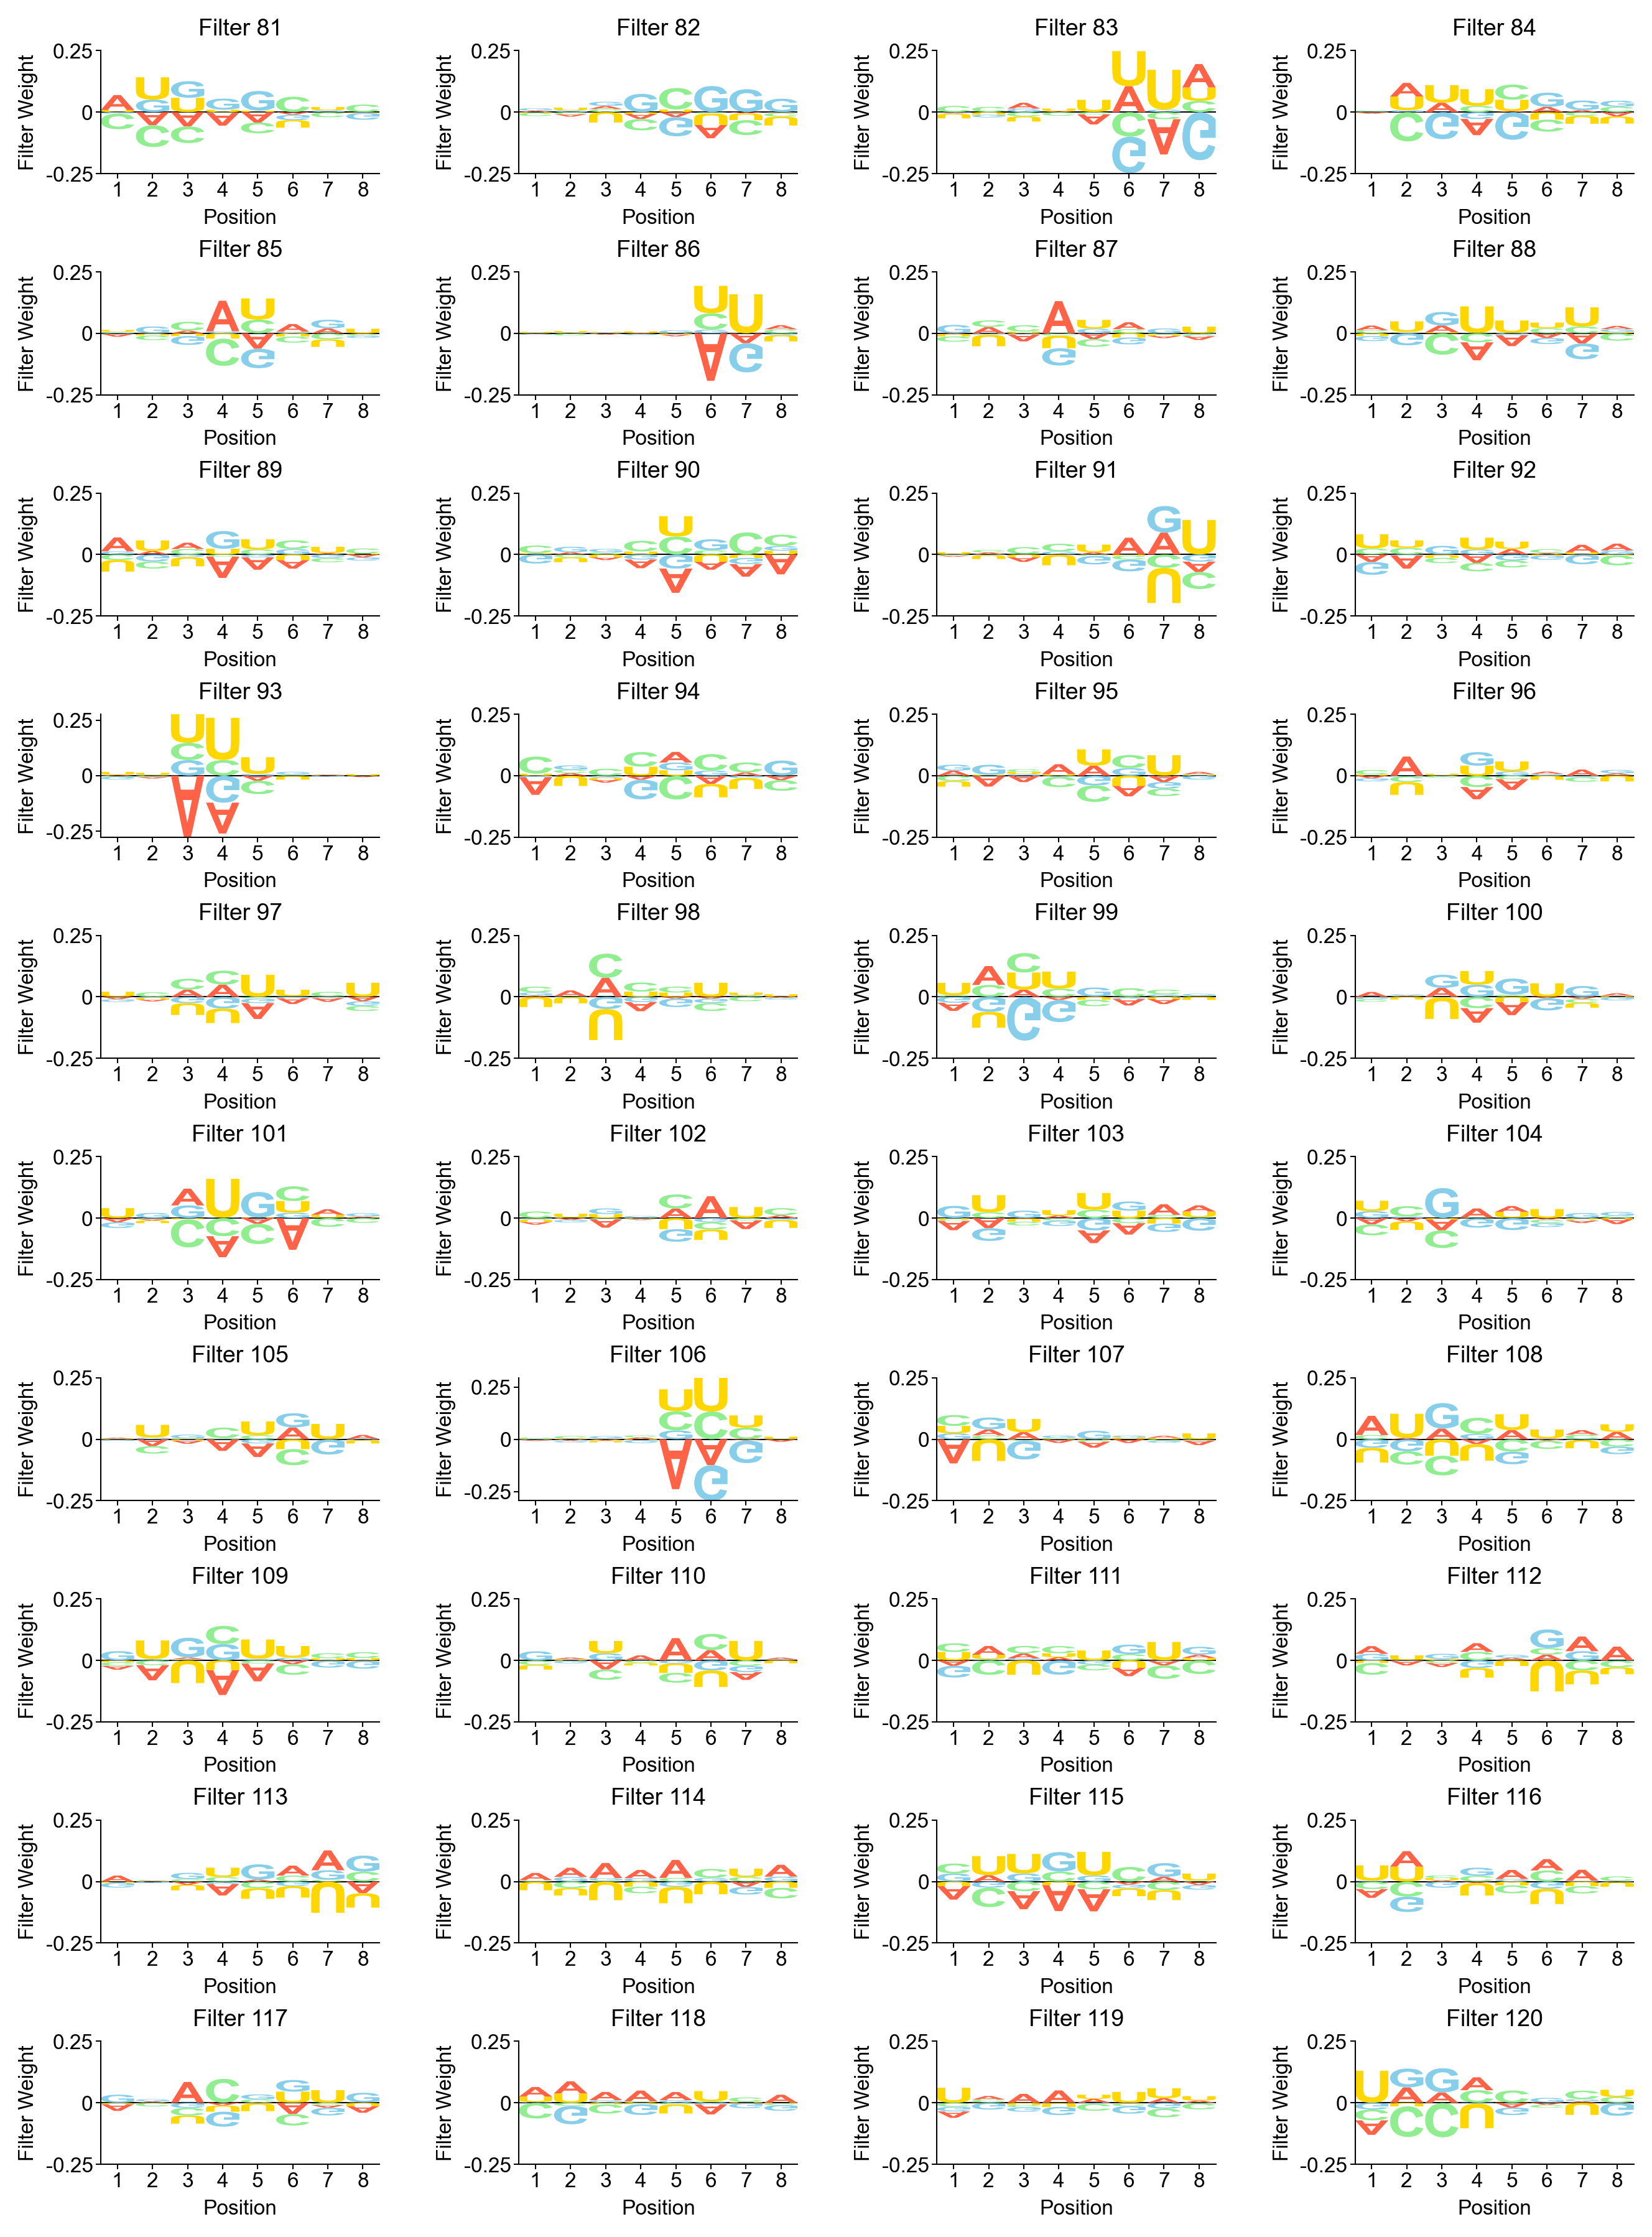

In [22]:
fig3 = draw_filter_logo(80, 120)
fig3.savefig('../figs/filterLogo3-lightcolor.png',dpi=300)